In [1]:
import nsepy as ns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from matplotlib import style
from datetime import date
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show

In [3]:
nifty_data = ns.get_history(symbol='NIFTY IT',
                    start=date(2017,1,1), 
                    end=date(2018,10,24), index=True)

In [4]:
nifty_data.index = pd.to_datetime(nifty_data.index)

In [5]:
nifty_data.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2017-01-02,10403.00,10434.10,10353.65,10367.05,5366213.0,4.188400e+09
2017-01-03,10386.60,10390.90,10291.25,10362.25,8413396.0,7.458500e+09
2017-01-04,10368.15,10517.55,10364.00,10496.90,11978446.0,1.004990e+10
2017-01-05,10539.75,10590.05,10379.30,10400.05,23534557.0,1.569580e+10
2017-01-06,10352.80,10372.90,10063.35,10110.40,26296599.0,1.935410e+10


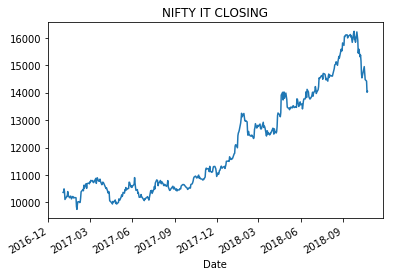

In [6]:
nifty_data['Close'].plot(title='NIFTY IT CLOSING')

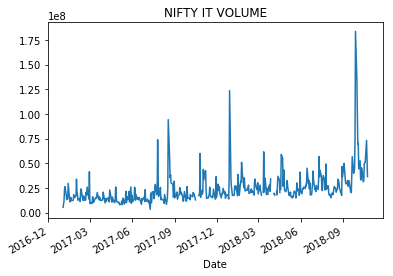

In [7]:
nifty_data['Volume'].plot(title='NIFTY IT VOLUME')

# Part 1: Moving Averages, Volume and Price Shocks##


In [8]:
# computer 4,16, 28, 40, 52 week moving average
def add_moving_averages(stock_index):
    for i in range(4, 53, 12):
        weeks = i
        days = weeks * 7
        stock_index['MA_{}_weeks'.format(weeks)] = stock_index.Close.rolling(window=days, min_periods=0).mean()

In [9]:

nifty_data_closing = pd.DataFrame(nifty_data.Close)
add_moving_averages(nifty_data_closing)

In [10]:

nifty_data_closing.tail()

,Close,MA_4_weeks,MA_16_weeks,MA_28_weeks,MA_40_weeks,MA_52_weeks
Date,,,,,,
2018-10-17,14949.60,15697.462500,14623.650893,13826.401276,12964.025357,12387.362637
2018-10-19,14476.85,15641.639286,14633.447321,13841.067092,12978.177143,12399.301648
2018-10-22,14421.40,15582.344643,14642.090179,13855.529847,12992.390179,12411.155769
2018-10-23,14014.70,15507.700000,14647.334821,13867.896684,13004.949821,12421.948077
2018-10-24,14049.15,15434.266071,14652.429018,13880.221173,13017.905179,12432.497527


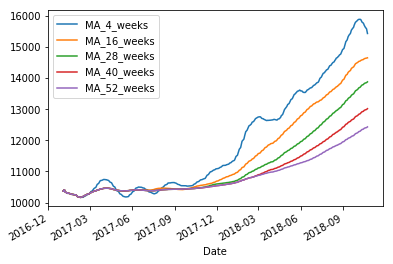

In [12]:
nifty_data_closing[['MA_4_weeks', 'MA_16_weeks', 'MA_28_weeks', 'MA_40_weeks' ,'MA_52_weeks']].plot()

In [13]:

# compute ohlc on a sample of 10 days
nifty_data_10_ohlc = nifty_data['Close'].resample('10D').ohlc()
nifty_data_10_ohlc.head()

,open,high,low,close
Date,,,,
2017-01-02,10367.05,10496.90,10110.40,10220.55
2017-01-12,10398.80,10398.80,10132.65,10132.65
2017-01-22,10219.40,10219.40,9848.50,9848.50
2017-02-01,9750.00,10387.85,9750.00,10387.85
2017-02-11,10452.90,10671.20,10427.65,10671.20


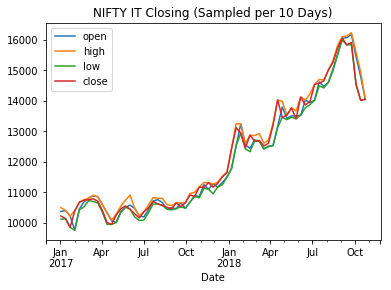

In [14]:
nifty_data_10_ohlc.plot(title='NIFTY IT Closing (Sampled per 10 Days)')

In [15]:

nifty_data['VolumeShock'] = pd.Series()
nifty_data['VolumeShock_dir'] = pd.Series()
nifty_data['PriceShock'] = pd.Series()
nifty_data['PriceShock_dir'] = pd.Series()
nifty_data['PriceShockWithoutVolumeShock'] = pd.Series()

In [16]:
for i in range(1, len(nifty_data.Volume)):
    # if volume traded is 10% higher than previous day 
    if nifty_data.Volume[i] > ( nifty_data.Volume[i - 1] + 0.1 * nifty_data.Volume[i - 1] ):
        nifty_data['VolumeShock'][i] = 1
        nifty_data['VolumeShock_dir'][i] = 1
    # if volume traded is 10% lower than previous day 
    elif nifty_data.Volume[i] < ( nifty_data.Volume[i - 1] - 0.1 * nifty_data.Volume[i - 1] ):
        nifty_data['VolumeShock'][i] = 1
        nifty_data['VolumeShock_dir'][i] = -1
    else:
        nifty_data['VolumeShock'][i] = 0
    
    # if closing price has a difference > 2%,
    if nifty_data.Close[i] > ( nifty_data.Close[i - 1] + 0.2 * nifty_data.Close[i - 1] ):
        nifty_data['PriceShock'][i] = 1
        nifty_data['PriceShock_dir'][i] = 1
    # if closing price has a difference < 2%,
    elif nifty_data.Close[i] < ( nifty_data.Close[i - 1] - 0.2 * nifty_data.Close[i - 1] ):
        nifty_data['PriceShock'][i] = 1
        nifty_data['PriceShock_dir'][i] = -1
    else:
        nifty_data['PriceShock'][i] = 0
    
    # if price shock but no volume shock
    if nifty_data['PriceShock'][i] == 1 and nifty_data['VolumeShock'][i] == 0:
        nifty_data['PriceShockWithoutVolumeShock'] = 1
    else:
        nifty_data['PriceShockWithoutVolumeShock'] = 0


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [17]:
nifty_data.head()

,Open,High,Low,Close,Volume,Turnover,VolumeShock,VolumeShock_dir,PriceShock,PriceShock_dir,PriceShockWithoutVolumeShock
Date,,,,,,,,,,,
2017-01-02,10403.00,10434.10,10353.65,10367.05,5366213.0,4.188400e+09,NaN,NaN,NaN,NaN,0
2017-01-03,10386.60,10390.90,10291.25,10362.25,8413396.0,7.458500e+09,1.0,1.0,0.0,NaN,0
2017-01-04,10368.15,10517.55,10364.00,10496.90,11978446.0,1.004990e+10,1.0,1.0,0.0,NaN,0
2017-01-05,10539.75,10590.05,10379.30,10400.05,23534557.0,1.569580e+10,1.0,1.0,0.0,NaN,0
2017-01-06,10352.80,10372.90,10063.35,10110.40,26296599.0,1.935410e+10,1.0,1.0,0.0,NaN,0


In [18]:
price = figure(x_axis_type="datetime", width=500, height=500, title="NIFTY IT Index - ClosingPrice", x_axis_label = 'Date', y_axis_label = 'Closing Price')
price.circle(pd.to_datetime(nifty_data.index), nifty_data.Close, size=7, color="blue", alpha=0.5)
show(price)

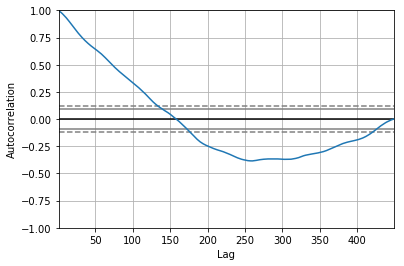

In [19]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(nifty_data.Close)

          Figure showing Autocrelation for Nifty IT Index

In [21]:
# stock info for infosys 2015-2016
company_stock = 'INFY'
start_date = date(2016, 1, 1)
end_date = date(2018, 10, 25)
nifty_it = ns.get_history(symbol='NIFTY IT',
                    start=start_date, 
                    end=end_date, index=True)
infy_stock = ns.get_history(symbol=company_stock,
                    start=start_date, 
                    end=end_date)

In [22]:
infy_stock.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2018-10-19,INFY,EQ,705.35,687.00,687.70,678.00,683.50,683.55,682.35,10421001,7.110757e+14,245258,6658247,0.6389
2018-10-22,INFY,EQ,683.55,688.70,695.05,673.80,680.50,679.95,679.08,6672840,4.531381e+14,118989,4592757,0.6883
2018-10-23,INFY,EQ,679.95,675.95,682.00,653.30,663.05,657.60,663.77,9041701,6.001591e+14,206699,6249984,0.6912
2018-10-24,INFY,EQ,657.60,663.00,666.50,647.15,650.00,649.80,653.45,7058164,4.612127e+14,151398,4319821,0.6120
2018-10-25,INFY,EQ,649.80,643.00,656.35,636.25,647.30,648.75,647.53,8270469,5.355339e+14,196622,5315499,0.6427


In [24]:
nifty_it['Prev Close'] = pd.Series()
for i in range(1, len(nifty_it)):
    nifty_it['Prev Close'][i] = nifty_it['Close'][i-1]
nifty_it.head()

,Open,High,Low,Close,Volume,Turnover,Prev Close
Date,,,,,,,
2016-01-01,11210.25,11221.60,11137.85,11174.85,3126850.0,3.190300e+09,NaN
2016-01-04,11144.00,11160.95,11004.65,11029.25,7875357.0,7.677800e+09,11174.85
2016-01-05,11082.60,11084.60,10945.20,10997.15,7909892.0,8.598800e+09,11029.25
2016-01-06,11027.55,11037.40,10979.45,11018.15,8585557.0,9.187500e+09,10997.15
2016-01-07,10947.75,10964.65,10822.70,10863.20,10454519.0,1.066610e+10,11018.15


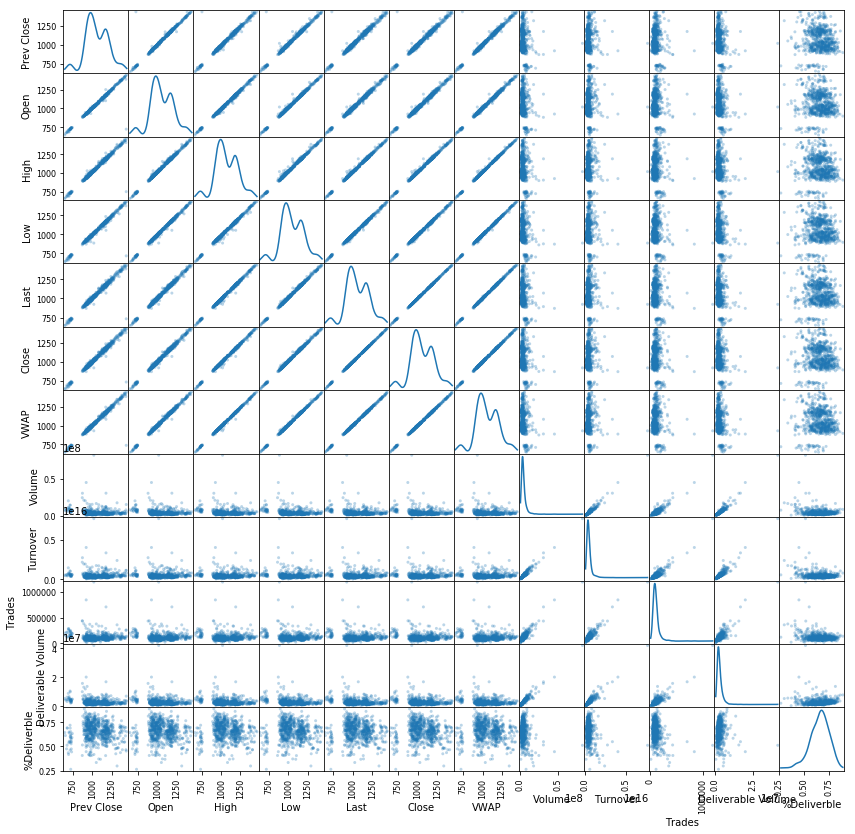

In [25]:
_=pd.plotting.scatter_matrix(infy_stock, alpha = 0.3, figsize = (14, 14), diagonal = 'kde')

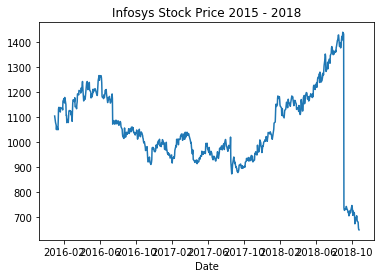

In [26]:
infy_stock['Close'].plot(title='Infosys Stock Price 2015 - 2018')

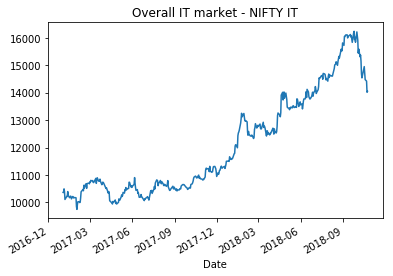

In [27]:
nifty_data['Close'].plot(title='Overall IT market - NIFTY IT')

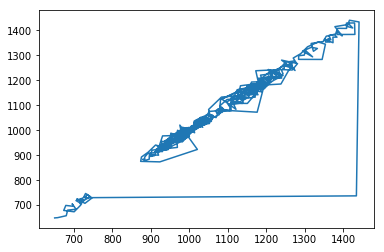

In [28]:
plt.plot(infy_stock['Prev Close'].values, infy_stock['Close'].values)

In [29]:
# Data Preprocessing and feature engineering
stock_day = [date.day for date in infy_stock.index.values]
stock_month = [date.month for date in infy_stock.index.values]
stock_prev_close = infy_stock['Prev Close'].values.reshape(1, -1)
stock_price = infy_stock.Close.values

In [30]:
# stack all three features together
X = np.dstack((stock_day, stock_month, stock_prev_close))[0]
y = stock_price

In [31]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [32]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
lGR = LinearRegression()

In [33]:
svr.fit(X, y)
lGR.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
#next Day prediction
svm_next_day_closing_price = svr.predict([[X[-1][0]+1, X[-1][1], X[-1][2]]])[0]
lm_next_day_closing_price = lGR.predict([[X[-1][0]+1, X[-1][1], X[-1][2]]])[0]
print('SVM Model predicted closing price for tommorow as: {:.2f}'.format(svm_next_day_closing_price))
print('Linear Regression Model predicted closing price for tommorow as: {:.2f}'.format(lm_next_day_closing_price))

SVM Model predicted closing price for tommorow as: 688.27
Linear Regression Model predicted closing price for tommorow as: 657.86


In [35]:
#10 days prediction
import datetime
svm_pred_prev_close = lm_pred_prev_close = X[-1][2]
day = X[-1][0]
month = X[-1][1]
year = 2018
for i in range(1, 11): 
    dt = date(year, int(month), int(day))
    dt += datetime.timedelta(days=i) 
    svm_next_day_closing_price = svr.predict([[dt.day,dt.month, svm_pred_prev_close]])[0]
    svm_pred_prev_close = svm_next_day_closing_price
    lm_next_day_closing_price = lGR.predict([[dt.day, dt.month, lm_pred_prev_close]])[0]
    lm_pred_prev_close = lm_next_day_closing_price
    print('SVM Model predicted closing price for {}-{}-{} as: {:.2f}'.format(dt.day, dt.month, dt.year, svm_next_day_closing_price))
    print('LRM Model predicted closing price for {}-{}-{} as: {:.2f}'.format(dt.day, dt.month, dt.year, lm_next_day_closing_price))
    print()

SVM Model predicted closing price for 26-10-2018 as: 688.27
LRM Model predicted closing price for 26-10-2018 as: 657.86

SVM Model predicted closing price for 27-10-2018 as: 1058.90
LRM Model predicted closing price for 27-10-2018 as: 666.00

SVM Model predicted closing price for 28-10-2018 as: 1056.07
LRM Model predicted closing price for 28-10-2018 as: 674.21

SVM Model predicted closing price for 29-10-2018 as: 1058.94
LRM Model predicted closing price for 29-10-2018 as: 682.50

SVM Model predicted closing price for 30-10-2018 as: 1060.57
LRM Model predicted closing price for 30-10-2018 as: 690.86

SVM Model predicted closing price for 31-10-2018 as: 1061.46
LRM Model predicted closing price for 31-10-2018 as: 699.29

SVM Model predicted closing price for 1-11-2018 as: 1061.62
LRM Model predicted closing price for 1-11-2018 as: 699.49

SVM Model predicted closing price for 2-11-2018 as: 1061.62
LRM Model predicted closing price for 2-11-2018 as: 699.94

SVM Model predicted closing p